In [114]:
!pip install mrjob matplotlib pyarrow nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.9 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 7.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 12.4 MB/s eta 0:00:00


In [28]:
import re
import matplotlib.pyplot as plt

In [29]:
!hadoop classpath --glob

/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/common/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoo

In [30]:
import os
os.environ['CLASSPATH'] = '/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/common/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/common/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/common/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/common/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/common/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/common/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/common/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/common/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/common/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/common/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/common/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/common/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/common/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/common/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/common/lib/jul-to-slf4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/common/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/common/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-api-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/common/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/common/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/hadoop-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6-tests.jar:/opt/hadoop/share/hadoop/common/hadoop-kms-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-registry-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs:/opt/hadoop/share/hadoop/hdfs/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-3.10.6.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-common-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/leveldbjni-all-1.8.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/json-simple-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/okio-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/hdfs/lib/okhttp-4.9.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/HikariCP-java7-2.4.12.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-httpfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6-tests.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-plugins-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-uploader-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-common-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-core-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-app-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-nativetask-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-shuffle-3.3.6.jar:/opt/hadoop/share/hadoop/yarn:/opt/hadoop/share/hadoop/yarn/lib/snakeyaml-2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/bcprov-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-commons-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/java-util-1.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-module-jaxb-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-common-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/ehcache-3.3.1.jar:/opt/hadoop/share/hadoop/yarn/lib/jline-3.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-annotations-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-client-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/json-io-2.5.1.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.inject-1.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-base-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-json-provider-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jakarta.xml.bind-api-2.3.2.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-client-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/objenesis-2.6.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-api-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/aopalliance-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/bcpkix-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-jndi-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-servlet-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-server-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-guice-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/geronimo-jcache_1.0_spec-1.0-alpha-1.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/swagger-annotations-1.5.4.jar:/opt/hadoop/share/hadoop/yarn/lib/fst-2.50.jar:/opt/hadoop/share/hadoop/yarn/lib/jna-5.2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-plus-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-client-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/mssql-jdbc-6.2.1.jre7.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-tree-9.4.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-web-proxy-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-tests-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-timeline-pluginstorage-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-unmanaged-am-launcher-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-mawo-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-registry-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-router-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-applicationhistoryservice-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-client-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-nodemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-resourcemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-distributedshell-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-sharedcachemanager-3.3.6.jar'

## Data Loading

In [31]:
from pyarrow import fs
hdfs = fs.HadoopFileSystem("namenode", 8020)

In [32]:
hdfs.create_dir('/user/hw1')

In [33]:
!hadoop fs -copyFromLocal SW_EpisodeIV.txt hdfs://namenode:8020/user/hw1
!hadoop fs -copyFromLocal SW_EpisodeV.txt hdfs://namenode:8020/user/hw1
!hadoop fs -copyFromLocal SW_EpisodeVI.txt hdfs://namenode:8020/user/hw1

copyFromLocal: `hdfs://namenode:8020/user/hw1/SW_EpisodeIV.txt': File exists
copyFromLocal: `hdfs://namenode:8020/user/hw1/SW_EpisodeV.txt': File exists
copyFromLocal: `hdfs://namenode:8020/user/hw1/SW_EpisodeVI.txt': File exists


In [34]:
!hadoop fs -ls hdfs://namenode:8020/user/hw1

Found 3 items
-rw-r--r--   3 root supergroup      78278 2023-12-05 20:37 hdfs://namenode:8020/user/hw1/SW_EpisodeIV.txt
-rw-r--r--   3 root supergroup      55487 2023-12-05 20:37 hdfs://namenode:8020/user/hw1/SW_EpisodeV.txt
-rw-r--r--   3 root supergroup      48176 2023-12-05 20:37 hdfs://namenode:8020/user/hw1/SW_EpisodeVI.txt


# Task 1

### Протестируем локально

In [52]:
%%file star_wars_dialogue_count.py

from mrjob.job import MRJob

class DialogueCount(MRJob):

    def mapper(self, _, line):
        fields = line.split('"')
        
        if len(fields) == 7:
            character = fields[3]
            yield (character, 1)

    def reducer(self, character, counts):
        yield (character, sum(counts))

if __name__ == "__main__":
    DialogueCount.run()

Overwriting star_wars_dialogue_count.py


In [54]:
!python3 star_wars_dialogue_count.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/star_wars_dialogue_count.root.20231205.185404.873326
Running step 1 of 1...
job output is in /tmp/star_wars_dialogue_count.root.20231205.185404.873326/output
Streaming final output from /tmp/star_wars_dialogue_count.root.20231205.185404.873326/output...
"VOICE OVER DEATH STAR INTERCOM"	1
"VOICE"	3
"WEDGE"	14
"WILLARD"	2
"WINGMAN"	2
"WOMAN"	1
"ASTRO-OFFICER"	1
"AUNT BERU"	6
"BARTENDER"	3
"BASE VOICE"	1
"BEN"	82
"RED NINE"	2
"RED SEVEN"	1
"RED TEN"	8
"SECOND OFFICER"	1
"SECOND TROOPER"	3
"TAGGE"	4
"TARKIN"	28
"TROOPER VOICE"	1
"TROOPER"	19
"VADER"	41
"LUKE"	254
"HAN"	153
"TECHNICIAN"	1
"THREEPIO"	118
"BERU"	1
"BIGGS"	34
"CAMIE"	2
"CAPTAIN"	1
"CHIEF PILOT"	1
"CHIEF"	2
"COMMANDER"	3
"HUMAN"	4
"IMPERIAL OFFICER"	2
"INTERCOM VOICE"	6
"JABBA"	6
"LEIA"	57
"CONTROL OFFICER"	1
"CREATURE"	1
"DEAK"	1
"DEATH STAR INTERCOM VOICE"	6
"DODONNA"	6
"FIRST OFFICER"	1
"FIRST TROOPER"	6
"

### Запустим на кластере

In [66]:
!python3 star_wars_dialogue_count.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    --output hdfs:///user/hw1/task1/output_4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/star_wars_dialogue_count.root.20231205.191212.766549
uploading working dir files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191212.766549/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191212.766549/files/
Running step 1 of 1...
  packageJobJar: [/tmp/hadoop-unjar748548734489712365/] [] /tmp/streamjob336204036056670815.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/stagin

In [67]:
!python3 star_wars_dialogue_count.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    --output hdfs:///user/hw1/task1/output_5

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/star_wars_dialogue_count.root.20231205.191249.821343
uploading working dir files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191249.821343/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191249.821343/files/
Running step 1 of 1...
  packageJobJar: [/tmp/hadoop-unjar6519182935731878463/] [] /tmp/streamjob134288121955299076.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/stagi

In [68]:
!python3 star_wars_dialogue_count.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task1/output_6

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/star_wars_dialogue_count.root.20231205.191327.618144
uploading working dir files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191327.618144/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191327.618144/files/
Running step 1 of 1...
  packageJobJar: [/tmp/hadoop-unjar1154878217908716212/] [] /tmp/streamjob3667321180346877409.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/stag

In [69]:
!python3 star_wars_dialogue_count.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task1/output_all

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/star_wars_dialogue_count.root.20231205.191405.105350
uploading working dir files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191405.105350/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/star_wars_dialogue_count.root.20231205.191405.105350/files/
Running step 1 of 1...
  packageJobJar: [/tmp/hadoop-unjar6160098918362865422/] [] /tmp/streamjob124921830157253621.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/stagi

### Получим данные из hdfs и визуализируем результаты

In [71]:
!mkdir outputs_task1

In [87]:
!hadoop fs -get \
    hdfs:///user/hw1/task1/output_4/ \
    hdfs:///user/hw1/task1/output_5/ \
    hdfs:///user/hw1/task1/output_6/ \
    hdfs:///user/hw1/task1/output_all/ \
    outputs_task1

get: `outputs_task1/output_4/_SUCCESS': File exists
get: `outputs_task1/output_4/part-00000': File exists
get: `outputs_task1/output_5/_SUCCESS': File exists
get: `outputs_task1/output_5/part-00000': File exists
get: `outputs_task1/output_6/_SUCCESS': File exists
get: `outputs_task1/output_6/part-00000': File exists
get: `outputs_task1/output_all/_SUCCESS': File exists
get: `outputs_task1/output_all/part-00000': File exists


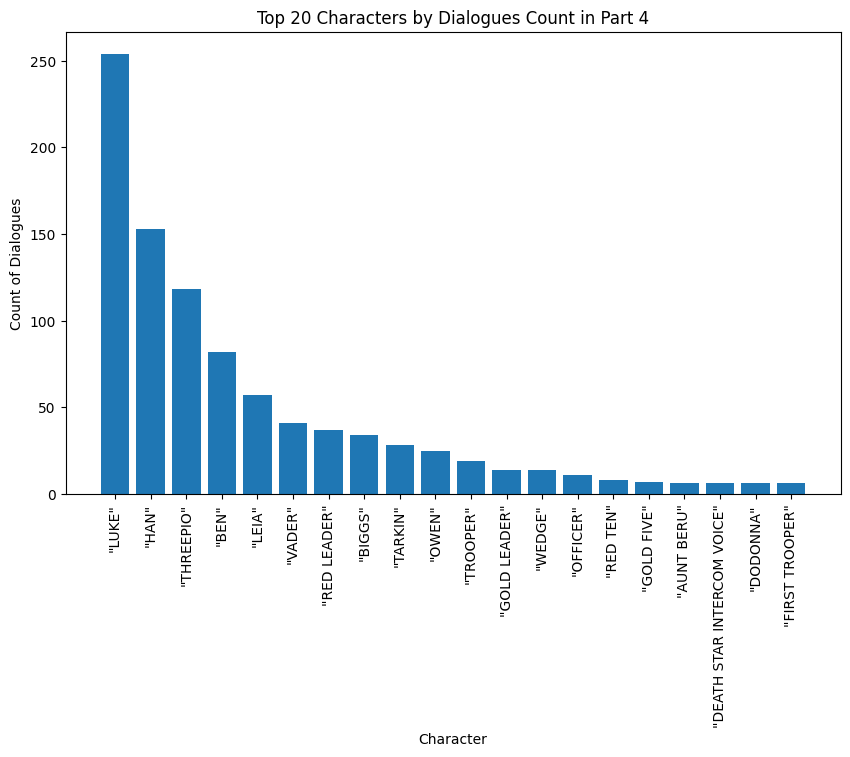

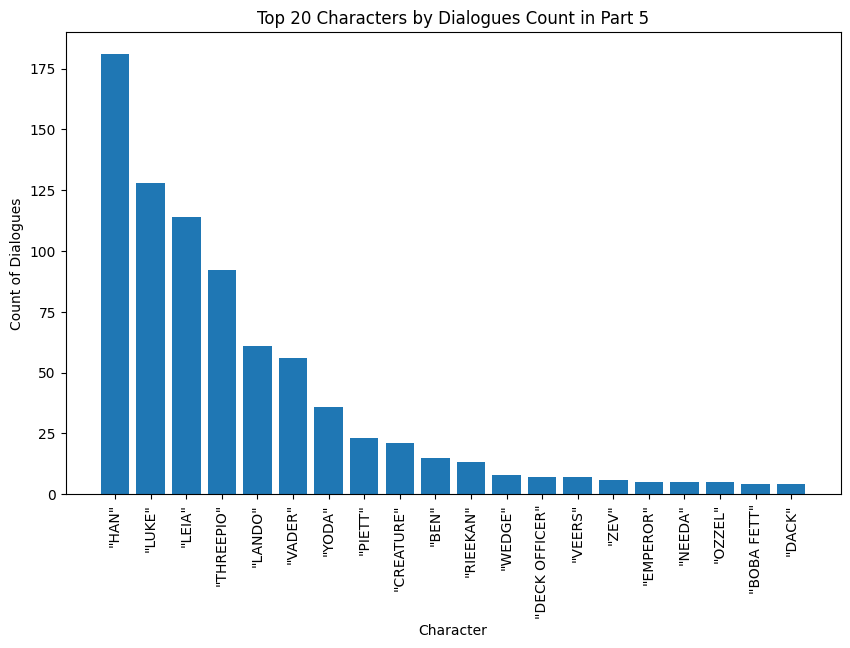

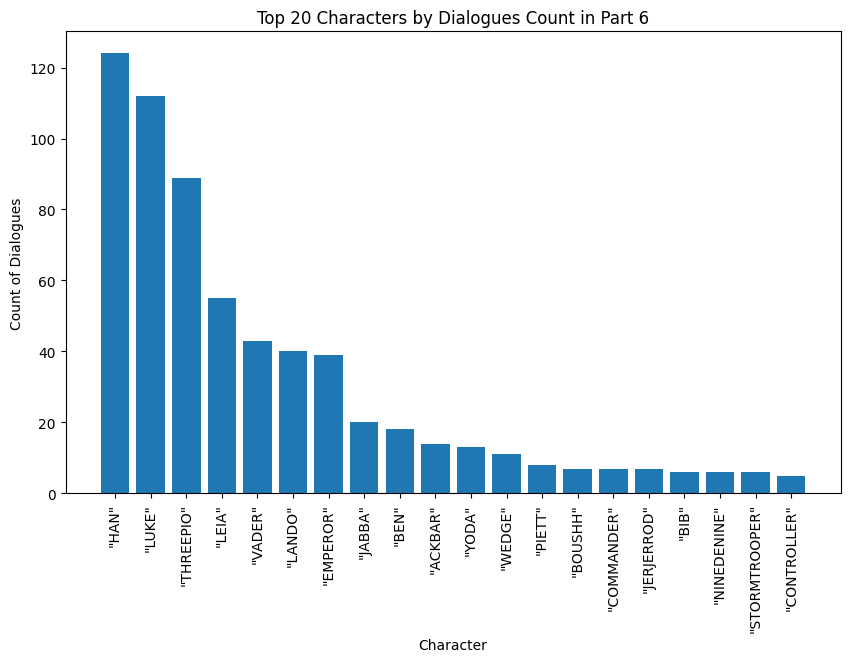

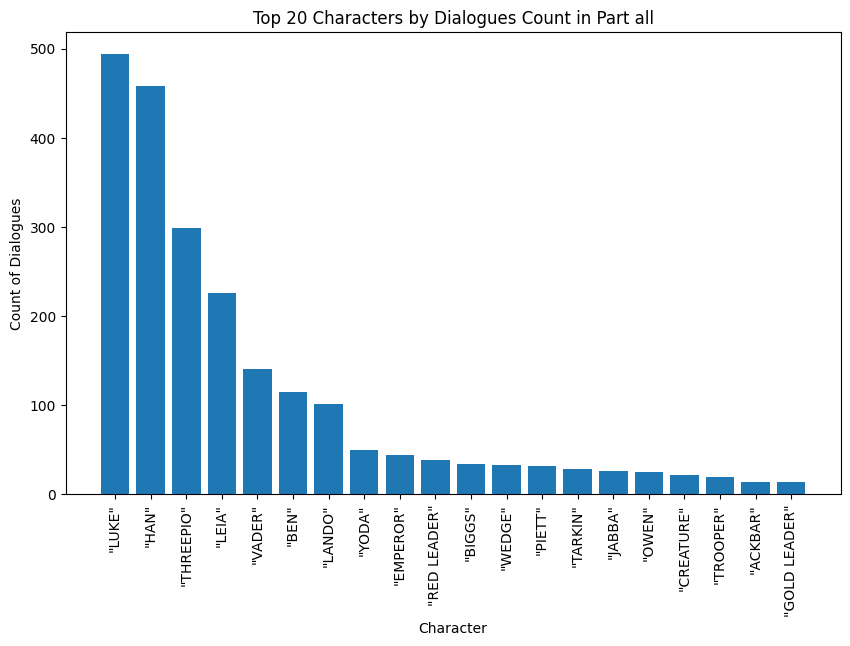

In [86]:
for i in ('4', '5', '6', 'all'):
    file_path = f'outputs_task1/output_{i}/part-00000'
    
    character_counts = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            character, count = parts
            character_counts[character] = int(count)
    
    sorted_counts = sorted(character_counts.items(), key=lambda x: x[1], reverse=True)
    top_characters = sorted_counts[:20]
    
    character_names = [char_count[0] for char_count in top_characters]
    counts = [char_count[1] for char_count in top_characters]
    
    plt.figure(figsize=(10, 6))
    plt.bar(character_names, counts)
    plt.xlabel('Character')
    plt.ylabel('Count of Dialogues')
    plt.title(f'Top 20 Characters by Dialogues Count in Part {i}')
    plt.xticks(rotation=90)
    plt.show()

# Task 2

In [92]:
%%file longest_phrase_by_character.py

from mrjob.job import MRJob
from mrjob.step import MRStep

class LongestPhraseByCharacter(MRJob):

    def mapper_extract_phrases(self, _, line):
        fields = line.strip().split('"')
        if len(fields) == 7:
            character, phrase = fields[3], fields[5]
            yield (character, phrase)

    def combiner_find_longest_phrase(self, character, phrases):
        longest_phrase = max(phrases, key=len)
        yield (character, longest_phrase)

    def reducer_find_longest_phrase(self, character, phrases):
        longest_phrase = max(phrases, key=len)
        yield None, (character, longest_phrase)

    def reducer_sort_and_output(self, _, character_longest_phrases):
        sorted_phrases = sorted(character_longest_phrases, key=lambda x: len(x[1]), reverse=True)
        for character, phrase in sorted_phrases:
            yield character, phrase

    def steps(self):
        return [
            MRStep(mapper=self.mapper_extract_phrases,
                   combiner=self.combiner_find_longest_phrase,
                   reducer=self.reducer_find_longest_phrase),
            MRStep(reducer=self.reducer_sort_and_output)
        ]

if __name__ == '__main__':
    LongestPhraseByCharacter.run()

Overwriting longest_phrase_by_character.py


### Протестируем локально

In [93]:
!python3 longest_phrase_by_character.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/longest_phrase_by_character.root.20231205.194011.059478
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/longest_phrase_by_character.root.20231205.194011.059478/output
Streaming final output from /tmp/longest_phrase_by_character.root.20231205.194011.059478/output...
"LEIA"	"General Kenobi, years ago you served my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire.  I regret that I am unable to present my father's request to you in person, but my ship has fallen under attack and I'm afraid my mission to bring you to Alderaan has failed.  I have placed information vital to the survival of the Rebellion into the memory systems of this R2 unit.  My father will know how to retrieve it.  You must see this droid safely delivered to him on Alderaan.  This is our most desperate hour.  Help me, Obi-Wan Kenobi, you're my

### Запустим на кластере

In [94]:
!python3 longest_phrase_by_character.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    --output hdfs:///user/hw1/task2/output_4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/longest_phrase_by_character.root.20231205.194215.265839
uploading working dir files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194215.265839/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194215.265839/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8166604188347607829/] [] /tmp/streamjob1148622093734818794.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-

In [95]:
!python3 longest_phrase_by_character.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    --output hdfs:///user/hw1/task2/output_5

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/longest_phrase_by_character.root.20231205.194315.890984
uploading working dir files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194315.890984/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194315.890984/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar4991159698639383981/] [] /tmp/streamjob8130111207081724737.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-

In [96]:
!python3 longest_phrase_by_character.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task2/output_6

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/longest_phrase_by_character.root.20231205.194417.025967
uploading working dir files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194417.025967/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194417.025967/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar7378501631901899324/] [] /tmp/streamjob5072439571827034437.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-

In [97]:
!python3 longest_phrase_by_character.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task2/output_all

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/longest_phrase_by_character.root.20231205.194517.038254
uploading working dir files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194517.038254/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/longest_phrase_by_character.root.20231205.194517.038254/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1014363869729037880/] [] /tmp/streamjob6731621904129124292.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.22.0.4:8032
  Disabling Erasure Coding for path: /tmp/hadoop-

In [98]:
!mkdir outputs_task2

In [99]:
!hadoop fs -get \
    hdfs:///user/hw1/task2/output_4/ \
    hdfs:///user/hw1/task2/output_5/ \
    hdfs:///user/hw1/task2/output_6/ \
    hdfs:///user/hw1/task2/output_all/ \
    outputs_task2

In [109]:
for i in ('4', '5', '6', 'all'):
    file_path = f'outputs_task2/output_{i}/part-00000'
    print(f'Longest phrases in Part {i}:\n')
    character_counts = {}
    with open(file_path, 'r') as file:
        data = file.read()
        print(data)

Longest phrases in Part 4:

"LEIA"	"General Kenobi, years ago you served my father in the Clone Wars.  Now he begs you to help him in his struggle against the Empire.  I regret that I am unable to present my father's request to you in person, but my ship has fallen under attack and I'm afraid my mission to bring you to Alderaan has failed.  I have placed information vital to the survival of the Rebellion into the memory systems of this R2 unit.  My father will know how to retrieve it.  You must see this droid safely delivered to him on Alderaan.  This is our most desperate hour.  Help me, Obi-Wan Kenobi, you're my only hope."
"BIGGS"	"I feel for you, Luke, you're going to have to learn what seems to be important or what really is important.  What good is all your uncle's work if it's taken over by the Empire?...  You know they're starting to nationalize commerce in the central systems...it won't be long before your uncle is merely a tenant, slaving for the greater glory of the Empire."

# Task 3

In [167]:
%%file number_of_bigrams.py

from mrjob.job import MRJob
from mrjob.step import MRStep

import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

nltk.download('punkt')
nltk.download('stopwords')

class NumberOfBigrams(MRJob):
    
    def mapper_preprocess_text(self, _, line):
        fields = line.strip().split('"')
        if len(fields) == 7:
            text = fields[5]
            
            text = text.lower()
            text = text.translate(str.maketrans(", ", len(", ")*" "))
            text = text.translate(str.maketrans("", "", string.punctuation))

            tokens = word_tokenize(text)
            stopwords = set(nltk.corpus.stopwords.words('english'))
            filtered_tokens = [token for token in tokens if token not in stopwords]
            
            bigrams = ngrams(filtered_tokens, 2)
            for bigram in bigrams:
                yield (bigram, 1)
    
    def combiner_count_bigrams(self, bigram, counts):
        yield (bigram, sum(counts))
        
    def reducer_count_bigrams(self, bigram, counts):
        yield None, (bigram, sum(counts))
        
    def reducer_find_top_20_bigrams(self, _, bigram_counts):
        top_20_bigrams = sorted(bigram_counts, key=lambda x: x[1], reverse=True)[:20]
        for bigram, count in top_20_bigrams:
            bigram_str = ' '.join(bigram)
            yield bigram_str, count
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper_preprocess_text,
                   combiner=self.combiner_count_bigrams,
                   reducer=self.reducer_count_bigrams),
            MRStep(reducer=self.reducer_find_top_20_bigrams)
        ]
    
if __name__ == '__main__':
    NumberOfBigrams().run()

Overwriting number_of_bigrams.py


### Протестируем локально

In [168]:
!python3 number_of_bigrams.py SW_EpisodeIV.txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/number_of_bigrams.root.20231205.213636.695867
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/number_of_bigrams.root.20231205.213636.695867/output
Streaming final output from /tmp/number_of_bigrams.root.20231205.213636.695867/output...
"im going"	13
"obiwan kenobi"	12
"dont know"	11
"r2 unit"	11
"rebel base"	11
"ive got"	10
"sand people"	10
"battle station"	10
"looks like"	9
"luke luke"	9
"youre going"	8
"uncle owen"	7
"lord vader"	7
"dont worry"	7
"dont think"	6
"know hes"	6
"weve got"	6
"come back"	6
"red leader"	6
"old man"	5
Removing temp directory /tmp/number_of_bigrams.root.20231205.213636.695867...


### Запустим на кластере

In [171]:
!python3 number_of_bigrams.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    --output hdfs:///user/hw1/task3/output_4

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/number_of_bigrams.root.20231205.214117.256157
uploading working dir files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214117.256157/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214117.256157/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar4614971617421472672/] [] /tmp/streamjob2127495719210020397

In [172]:
!python3 number_of_bigrams.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    --output hdfs:///user/hw1/task3/output_5

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/number_of_bigrams.root.20231205.214225.673736
uploading working dir files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214225.673736/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214225.673736/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar6162206063845793892/] [] /tmp/streamjob6510529913264150241

In [173]:
!python3 number_of_bigrams.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task3/output_6

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/number_of_bigrams.root.20231205.214334.508121
uploading working dir files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214334.508121/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214334.508121/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar4213723695749140752/] [] /tmp/streamjob7782303349784756387

In [174]:
!python3 number_of_bigrams.py -r hadoop \
    hdfs:///user/hw1/SW_EpisodeIV.txt \
    hdfs:///user/hw1/SW_EpisodeV.txt \
    hdfs:///user/hw1/SW_EpisodeVI.txt \
    --output hdfs:///user/hw1/task3/output_all

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/number_of_bigrams.root.20231205.214443.646348
uploading working dir files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214443.646348/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/number_of_bigrams.root.20231205.214443.646348/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar8644740231945791074/] [] /tmp/streamjob772663491232222181.

In [175]:
!mkdir outputs_task3

In [176]:
!hadoop fs -get \
    hdfs:///user/hw1/task3/output_4/ \
    hdfs:///user/hw1/task3/output_5/ \
    hdfs:///user/hw1/task3/output_6/ \
    hdfs:///user/hw1/task3/output_all/ \
    outputs_task3

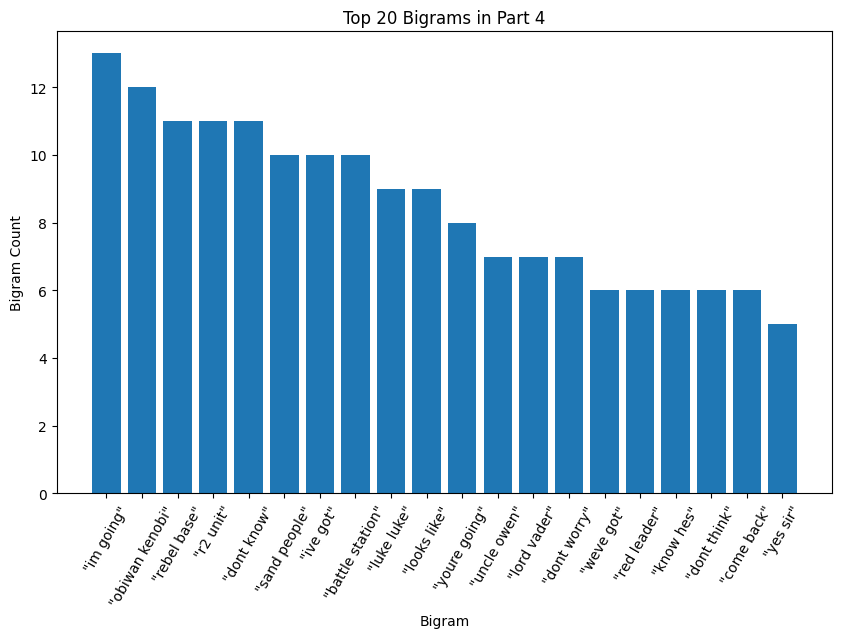

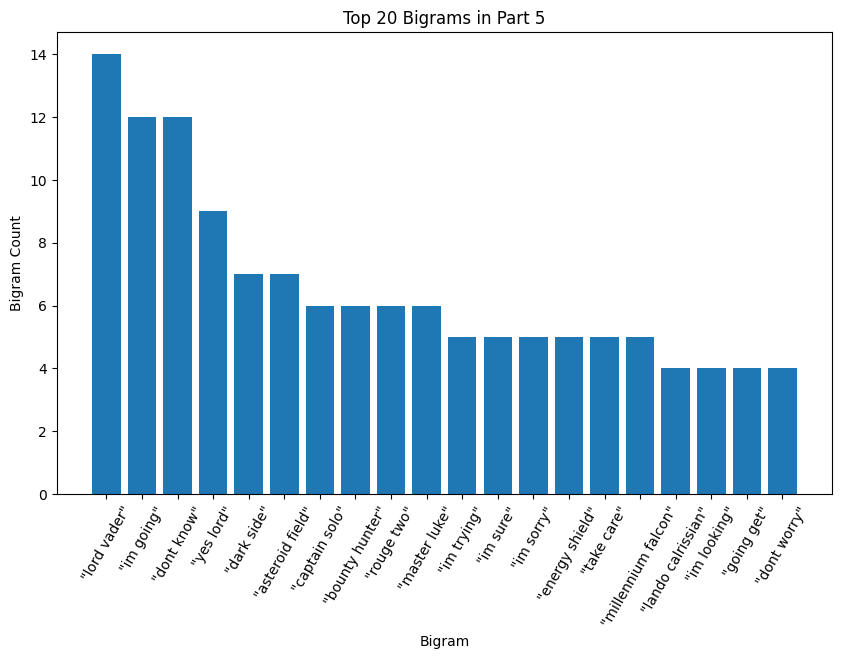

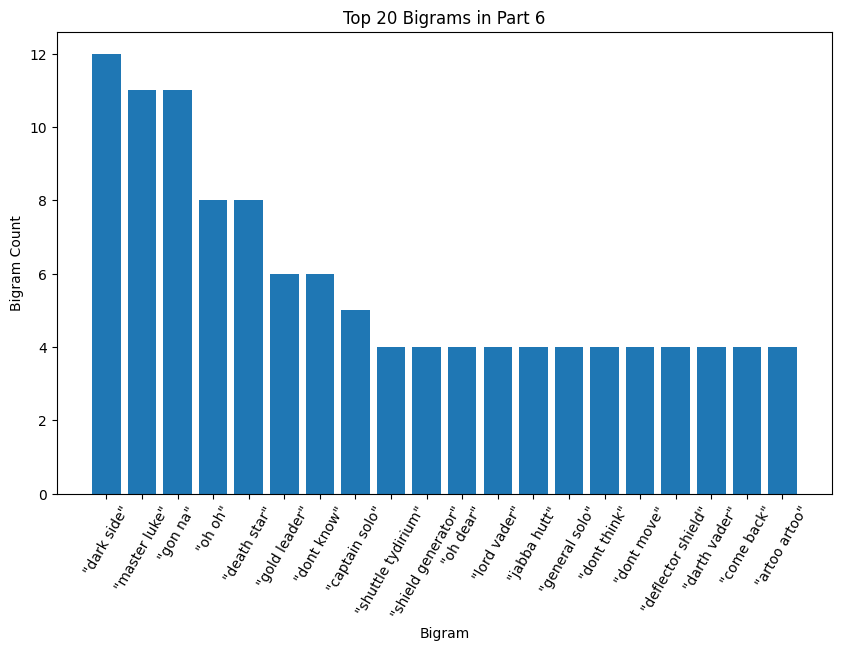

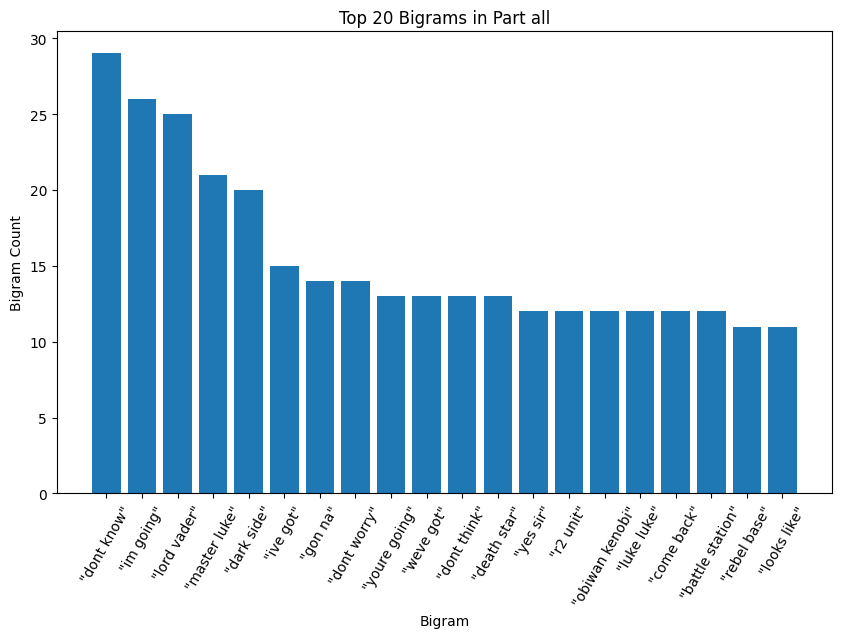

In [189]:
for i in ('4', '5', '6', 'all'):
    file_path = f'outputs_task3/output_{i}/part-00000'
    
    bigram_counts = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            bigram, count = parts
            bigram_counts[bigram] = int(count)

    bigram_names, counts = bigram_counts.keys(), bigram_counts.values()
    
    plt.figure(figsize=(10, 6))
    plt.bar(bigram_names, counts)
    plt.xlabel('Bigram')
    plt.ylabel('Bigram Count')
    plt.title(f'Top 20 Bigrams in Part {i}')
    plt.xticks(rotation=60)
    plt.show()